# **Importing and reading dataset**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

df = pd.read_excel(r'C:\Users\User\Desktop\iris.xls')

In [2]:
# Displaying first few rows

df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Concise summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Statistical summary of dataset

df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **Data Cleaning**

In [5]:
# Checking for null values

df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

**Insight :  As we can see there missing values in 'SL', SW' and 'PL'**

array([[<AxesSubplot:title={'center':'SL'}>,
        <AxesSubplot:title={'center':'SW'}>,
        <AxesSubplot:title={'center':'PL'}>],
       [<AxesSubplot:title={'center':'PW'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

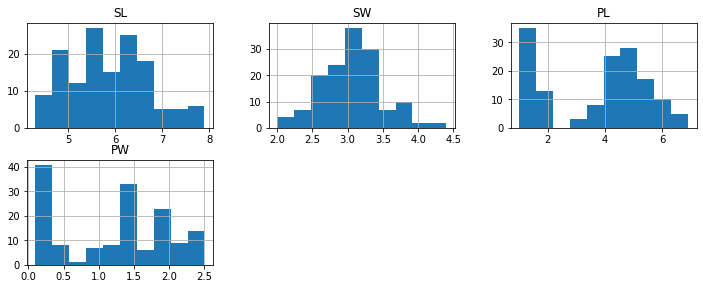

In [6]:
# Histogram of features

df.hist(figsize=(12,12),layout=(5,3))

In [7]:
# Filling missing values

df['SL']=df['SL'].fillna(df['SL'].median())
df['SW']=df['SW'].fillna(df['SW'].median())
df['PL']=df['PL'].fillna(df['PL'].median())

In [8]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## **Outliers**

SL       AxesSubplot(0.125,0.749828;0.227941x0.130172)
SW    AxesSubplot(0.398529,0.749828;0.227941x0.130172)
PL    AxesSubplot(0.672059,0.749828;0.227941x0.130172)
PW       AxesSubplot(0.125,0.593621;0.227941x0.130172)
dtype: object

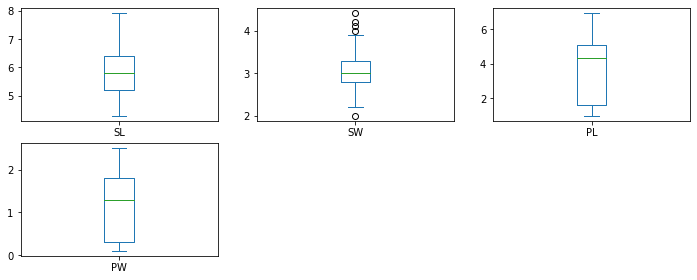

In [9]:
# Checking for outliers

df.plot(kind='box',subplots=True,figsize=(12,12),layout=(5,3))

**Insight : As we can see there are outliers present in 'SW' feature**

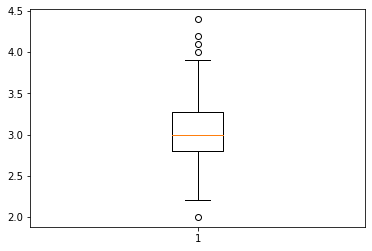

In [10]:
# Boxplot of 'SW' (to take a closer look)

plt.boxplot(df['SW'])
plt.show()

In [11]:
# Calculating percentiles

Q1 = np.percentile(df['SW'],25,interpolation='midpoint')
Q2 = np.percentile(df['SW'],50,interpolation='midpoint')
Q3 = np.percentile(df['SW'],75,interpolation='midpoint')
print('Q1 = ',Q1,'\nQ2 = ',round(Q2,2),'\nQ3 = ',Q3)

# Calculating inter quartile range

IQR = Q3-Q1
print('IQR = ',round(IQR,2))

# Calculating the upper and lower limit of outliers

low_lim = Q1-(1.5*IQR)
up_lim = Q3+(1.5*IQR)
print('Upper limit = ',up_lim ,'\nLower limit = ',low_lim)

# Creating a list of outliers

outlier=[]
for x in df['SW']:
    if (x>up_lim or x<low_lim):
        outlier.append(x)
print('List of outliers: ',outlier)

Q1 =  2.8 
Q2 =  3.0 
Q3 =  3.25
IQR =  0.45
Upper limit =  3.9250000000000003 
Lower limit =  2.1249999999999996
List of outliers:  [4.0, 4.4, 4.1, 4.2, 2.0]


In [12]:
# Finding the index values of outliers

df.loc[(df['SW']>up_lim ) | (df['SW']<low_lim)].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [13]:
# Removing outliers

df.drop([ 14, 15, 32, 33, 60],inplace=True)

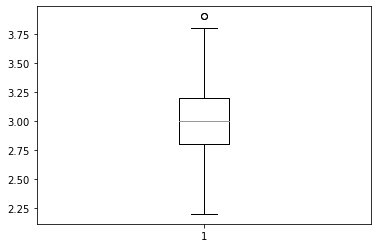

In [14]:
# Boxplot of 'SW' after removing outliers

plt.boxplot(df['SW'])
plt.show()

In [15]:
# Splitting data into independent and dependent variables

# Dependent variable 'y'
y = df['Classification']
# Independent variable 'x'
x = df.drop(['Classification'],axis=1)

In [16]:
# Statistical summary of 'x'

x.describe()

,SL,SW,PL,PW
count,145.000000,145.000000,145.000000,145.000000
mean,5.867586,3.023448,3.847586,1.226897
std,0.816827,0.374354,1.712265,0.758219
min,4.300000,2.200000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.200000,5.100000,1.800000
max,7.900000,3.900000,6.900000,2.500000


## **Normalization**

In [17]:
# Normalizing

from sklearn import preprocessing
x=preprocessing.normalize(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3
count,145.000000,145.000000,145.000000,145.000000
mean,0.750558,0.397703,0.465043,0.144106
std,0.048136,0.097243,0.154637,0.077887
min,0.631396,0.238392,0.168646,0.016695
25%,0.713666,0.325894,0.262330,0.051382
50%,0.747142,0.354212,0.539660,0.164742
75%,0.788928,0.507020,0.582878,0.197997
max,0.860939,0.607125,0.636981,0.280419


## **Models**

In [18]:
# Splitting data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### **Logistic Regression Model**

In [19]:
# Logitic regression model

from sklearn.linear_model import LogisticRegression
logis_model=LogisticRegression()
logis_model.fit(x_train,y_train)
y_pred = logis_model.predict(x_test)

In [20]:
# Valuating the model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'macro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'macro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'macro'))

Accuracy is:  0.8275862068965517
Precision is:  0.8958333333333334
Recall is:  0.8148148148148149
F1 score is:  0.8100664767331435


In [21]:
# Confusion matrix

confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  4,  5],
       [ 0,  0, 11]], dtype=int64)

### **KNN Model**

Minimum error:- 0.034482758620689655 at K = 16


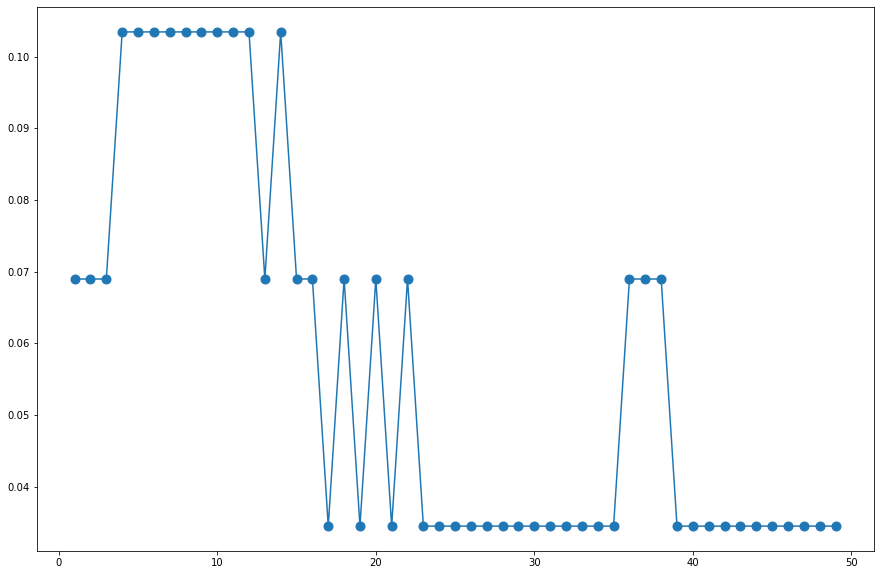

In [22]:
# Finding optimal k value

from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [23]:
classifier=KNeighborsClassifier(n_neighbors=16,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [24]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'macro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'macro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'macro'))

Accuracy is:  0.9310344827586207
Precision is:  0.9326599326599326
Recall is:  0.9326599326599326
F1 score is:  0.9326599326599326


In [25]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

### **Decision Tree Model**

In [26]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt_model =DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [27]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'macro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'macro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'macro'))

Accuracy is:  0.9310344827586207
Precision is:  0.9487179487179488
Recall is:  0.9259259259259259
F1 score is:  0.9305555555555555


In [28]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  7,  2],
       [ 0,  0, 11]], dtype=int64)

### **Support Vector Machine**

In [29]:
# Radial SVM model

from sklearn.svm import SVC
svm_linear=SVC(kernel='rbf')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [30]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average = 'macro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'macro'))
print("F1 score is: ", f1_score(y_test,y_pred,  average = 'macro'))

Accuracy is:  0.9655172413793104
Precision is:  0.9722222222222222
Recall is:  0.9629629629629629
F1 score is:  0.9658994032395567


In [31]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

### **Random Forest**

In [32]:
# Random forest model

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [33]:
print("Accuracy is: ", accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred,  average = 'macro'))
print("Recall is: ", recall_score(y_test,y_pred,  average = 'macro'))
print("F1 score is: ", f1_score(y_test,y_pred, average = 'macro'))

Accuracy is:  0.9655172413793104
Precision is:  0.9722222222222222
Recall is:  0.9629629629629629
F1 score is:  0.9658994032395567


In [34]:
confusion_matrix (y_test, y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

### **Feature Importance**

In [35]:
pd.Series(rf.feature_importances_, index = x.columns).sort_values(ascending=False)*100

3    37.149251
2    31.155986
1    24.392404
0     7.302359
dtype: float64

# Conclusion

### **Insight : Out of the 5 models SVM and Random forest gave the highest accuracy and they are the best models**